LASSO 回归同样是通过添加正则项来改进普通最小二乘法，不过这里添加的是L1正则项。

sklearn.linear_model.Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
- alpha: 正则化强度，默认为 1.0。
- fit_intercept: 默认为 True，计算截距项。
- normalize: 默认为 False，不针对数据进行标准化处理。
- precompute: 是否使用预先计算的 Gram 矩阵来加速计算。
- copy_X: 默认为 True，即使用数据的副本进行操作，防止影响原数据。
- max_iter: 最大迭代次数，默认为 1000。
- tol: 数据解算精度。
- warm_start: 重用先前调用的解决方案以适合初始化。
- positive: 强制系数为正值。
- random_state: 随机数发生器。
- selection: 每次迭代都会更新一个随机系数。

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

实际参数 w:  [3 7 6 9 2 3 5 6 3 7]
实际函数值 y:  [14.14761905 10.1232684   8.12233045  6.8529637   5.95634643  5.28188478
  4.75274309  4.32480306  3.97061256  3.67205737]


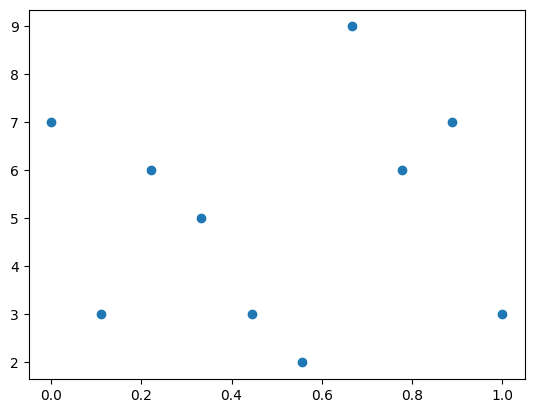

In [3]:
from scipy.linalg import hilbert

# x 自变量数据矩阵
x = hilbert(10)  # 使用 Scipy的hilbert()方法，生成 10x10 的希尔伯特矩阵, 希尔伯特矩阵每一列数据间都存在着较高的数值相关性。

# 模型参数
#np.random.seed(10)  # 随机数种子，能保证每次生成的随机数一致
#w = np.random.randint(2, 10, 10)  # 生成10个数为 w 系数
w = np.array([3,7,6,9,2,3,5,6,3,7])

# 拟合函数 y = w1 * x1 ＋ w2 * x2＋......＋ w10 * x10 = np.dot(x, w)

# y 因变量数据矩阵
y = np.dot(x, w)

print("实际参数 w: ", w)
print("实际函数值 y: ", y)
plt.scatter(np.linspace(1, 0, 10), w) # 实际参数

In [4]:
# 最小二乘法对数据集进行线性拟合, 实际参数和拟合参数 差距非常大
from scipy.optimize import leastsq

func = lambda p, x: np.dot(x, p)  # 函数公式
err_func = lambda p, x, y: func(p, x) - y  # 残差函数
p_init = np.random.randint(1, 2, 10)  # 全部参数初始化为 1

parameters = leastsq(err_func, p_init, args=(x, y))  # 最小二乘法求解
best_params = parameters[0] # 最优拟合参数
print("拟合参数 w: ", best_params)

拟合参数 w:  [ 2.99996433  6.99997193  6.01830022  8.88747745  1.7711385   6.40883043
 -5.62901117 21.26483258 -7.60552279  9.88431687]


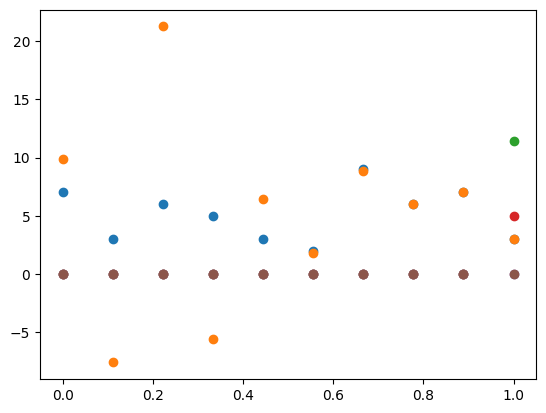

In [7]:
"""使用 LASSO 回归拟合并绘图
"""
from sklearn.linear_model import Lasso

alphas = np.linspace(1, 10, 10)
lasso_coefs = []

for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=False)
    lasso.fit(x, y)
    lasso_coefs.append(lasso.coef_)

plt.scatter(np.linspace(1, 0, 10), w) # 实际参数

plt.scatter(np.linspace(1, 0, 10), parameters[0])  # 普通最小二乘法拟合的 w 值放入图中

plt.scatter(np.linspace(1, 0, 10), lasso_coefs[0])  # LASSO拟合的 w 值放入图中
plt.scatter(np.linspace(1, 0, 10), lasso_coefs[1])  # LASSO拟合的 w 值放入图中
plt.scatter(np.linspace(1, 0, 10), lasso_coefs[8])  # LASSO拟合的 w 值放入图中
plt.scatter(np.linspace(1, 0, 10), lasso_coefs[9])  # LASSO拟合的 w 值放入图中

Text(0.5, 1.0, 'Lasso Regression')

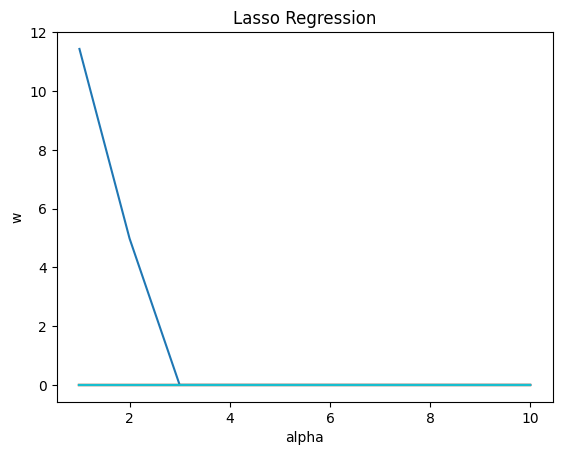

In [6]:
# 当 alpha 取值越大时，正则项主导收敛过程，各 w系数趋近于 0。当 alpha 很小时，各w系数波动幅度变大。
plt.plot(alphas, lasso_coefs)  # 绘制不同 alpha 参数下的 w 拟合值

plt.xlabel("alpha")
plt.ylabel("w")
plt.title("Lasso Regression")